In [1]:
import pandas as pd
url = 'https://data.insideairbnb.com/united-kingdom/england/london/2025-06-10/visualisations/listings.csv'
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,264776,Huge Four Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44306,-0.01948,Entire home/apt,297.0,3,68,2025-05-28,0.51,11,293,12,NaN
1,264777,One Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44284,-0.01997,Entire home/apt,98.0,3,24,2024-12-11,0.22,11,318,4,NaN
2,264778,Two Bedroom Newly Refurbished Apartment,1389063,Sue,NaN,Lewisham,51.44359,-0.02275,Entire home/apt,148.0,3,58,2025-05-01,0.43,11,302,6,NaN
3,264779,Refurbished Two Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44355,-0.02309,Entire home/apt,144.0,3,36,2025-04-10,0.30,11,328,7,NaN
4,264780,Spacious refurbished 2 bedroom apt with balcony,1389063,Sue,NaN,Lewisham,51.44333,-0.02307,Entire home/apt,157.0,3,54,2024-12-29,0.35,11,255,4,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              96651 non-null  int64  
 1   name                            96651 non-null  object 
 2   host_id                         96651 non-null  int64  
 3   host_name                       96611 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   96651 non-null  object 
 6   latitude                        96651 non-null  float64
 7   longitude                       96651 non-null  float64
 8   room_type                       96651 non-null  object 
 9   price                           62684 non-null  float64
 10  minimum_nights                  96651 non-null  int64  
 11  number_of_reviews               96651 non-null  int64  
 12  last_review                     

In [3]:
df = df.drop(columns=['neighbourhood_group', 'license'])

print("Kolom setelah dihapus:")
print(df.columns)

Kolom setelah dihapus:
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')


In [4]:
df = df.dropna(subset=['price'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62684 entries, 0 to 96650
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              62684 non-null  int64  
 1   name                            62684 non-null  object 
 2   host_id                         62684 non-null  int64  
 3   host_name                       62656 non-null  object 
 4   neighbourhood                   62684 non-null  object 
 5   latitude                        62684 non-null  float64
 6   longitude                       62684 non-null  float64
 7   room_type                       62684 non-null  object 
 8   price                           62684 non-null  float64
 9   minimum_nights                  62684 non-null  int64  
 10  number_of_reviews               62684 non-null  int64  
 11  last_review                     47688 non-null  object 
 12  reviews_per_month               47688

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.268400e+04,6.268400e+04,62684.000000,62684.000000,62684.000000,62684.000000,62684.000000,47688.000000,62684.000000,62684.000000,62684.000000
mean,8.418480e+17,2.512154e+08,51.509685,-0.129431,213.366058,5.022621,25.619951,1.234027,20.282225,204.611336,7.820241
std,5.247065e+17,2.256440e+08,0.049232,0.104835,860.901557,18.263114,57.195141,1.398873,59.642782,120.135494,13.758947
min,1.391300e+04,2.594000e+03,51.295937,-0.496075,6.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,5.618492e+17,3.472167e+07,51.485944,-0.191440,75.000000,1.000000,1.000000,0.310000,1.000000,89.000000,0.000000
50%,1.020378e+18,1.806404e+08,51.513313,-0.133039,135.000000,2.000000,6.000000,0.780000,3.000000,219.000000,2.000000
75%,1.279877e+18,4.731279e+08,51.537213,-0.069950,225.000000,3.000000,25.000000,1.630000,13.000000,319.000000,9.000000
max,1.439673e+18,7.001298e+08,51.682630,0.278960,74100.000000,999.000000,1855.000000,38.410000,495.000000,365.000000,355.000000


In [6]:
df = df[df['price'] > 10]

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.267900e+04,6.267900e+04,62679.000000,62679.000000,62679.000000,62679.000000,62679.000000,47686.000000,62679.000000,62679.000000,62679.000000
mean,8.418592e+17,2.512111e+08,51.509685,-0.129439,213.382425,5.020039,25.621325,1.234051,20.283237,204.618150,7.820705
std,5.246991e+17,2.256498e+08,0.049222,0.104831,860.933944,18.250132,57.197052,1.398896,59.645028,120.131173,13.759376
min,1.391300e+04,2.594000e+03,51.295937,-0.496075,11.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,5.619522e+17,3.472167e+07,51.485947,-0.191440,75.000000,1.000000,1.000000,0.310000,1.000000,89.000000,0.000000
50%,1.020384e+18,1.806404e+08,51.513310,-0.133040,135.000000,2.000000,6.000000,0.780000,3.000000,219.000000,2.000000
75%,1.279881e+18,4.731279e+08,51.537210,-0.069950,225.000000,3.000000,25.000000,1.630000,13.000000,319.000000,9.000000
max,1.439673e+18,7.001298e+08,51.682630,0.278960,74100.000000,999.000000,1855.000000,38.410000,495.000000,365.000000,355.000000


Text(0, 0.5, 'Jumlah Properti')

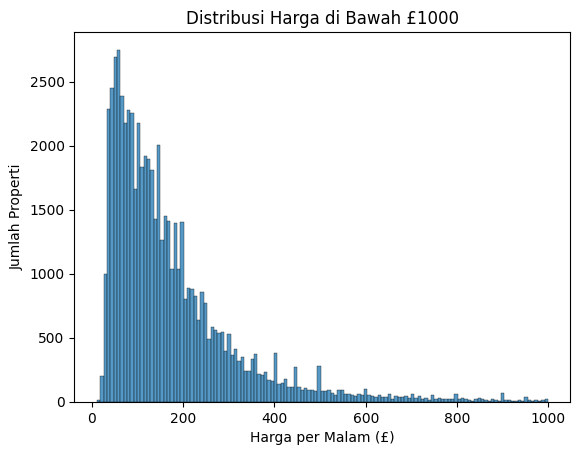

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df[df['price'] < 1000]['price'])

plt.title('Distribusi Harga di Bawah £1000')
plt.xlabel('Harga per Malam (£)')
plt.ylabel('Jumlah Properti')